In [1]:
import pandas as pd
from datetime import datetime

**Data set about Value of Energy Cost Saving Program for businesses in New York City**

In [2]:
df=pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv',parse_dates=['Effective Date'], date_parser=lambda x: datetime.strptime(x,'%m/%d/%Y'))

In [3]:
#TABLE INFORMATION:
#print('More information:', df.info())
#print('Data Types:', df.dtypes)
print('Shape of the data frame:', df.shape)
# No. of Columns: 450 columns 
print('Column names:', df.columns)
# No. of Rows: 26 rows
print('Row names:', df.index)

Shape of the data frame: (450, 26)
Column names: Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')
Row names: RangeIndex(start=0, stop=450, step=1)


### DAY 4 ACTION ITEMS

1. How many different companies are represented in the data set?
2. What is the total number of jobs created for businesses in Queens?
3. How many different unique email domains names are there in the data set?
4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
5. Save your result for the previous question as a CSV file.

In [4]:
#Q1: How many different companies are represented in the data set?
#A1: 439

#METHOD 1
#df['Company Name'].value_counts()

#METHOD 2
d4q1=len(df['Company Name'].unique())

print(f'There are {d4q1} different companies in the data set.')

There are 439 different companies in the data set.


In [5]:
#Q2: What is the total number of jobs created for businesses in Queens?
#A2:102

#METHOD 1: FILTERING
filt=df['Borough']=='Queens'
d4q2=df[filt]['Job created'].sum()

#METHOD 2: GROUPING
#df['Job created'].sum()
#df_grp=df.groupby(['Borough'])
#df_grp['Job created'].sum()
#df_grp.get_group('Queens')['Job created'].sum()
print('The total number of jobs created for businesses in Queens is {0:3.0f}.'.format(d4q2))

The total number of jobs created for businesses in Queens is 102.


In [6]:
#Q3: How many different unique email domains names are there in the data set?
#A3: 361
emails=df['company email'].str.rsplit('@')
emails=emails[-emails.isna()]
domains=emails.apply(lambda x: x[-1])
d4q3=len(domains.unique())
print('There are {0:d} different unique email domains names are there in the data set.'.format(d4q3))

There are 361 different unique email domains names are there in the data set.


In [7]:
#Task 4: Considering only NTAs with at least 5 listed businesses, ...
#   what is the average total savings and the total jobs created for each NTA?

#METHOD 1
df_grp2=df.groupby(['NTA'])
#create new data frame with unique NTAs as row index and has columns: 
ntas=pd.DataFrame(df['NTA'].value_counts())
ntas['Average Savings']=df_grp2[['Total Savings']].mean()
ntas['Job created']=df_grp2[['Job created']].sum()
#filter so that we only see values of NTAs with 5 listed businesses 
filt=ntas['NTA']>=5
data_D4Q4=ntas[filt]
data_D4Q4.to_csv('data_D4Q4.csv')
##METHOD 2
##create new data frame with unique NTAs as row index and has columns: 
#ntas2=pd.DataFrame(df_grp2['Company Name'].agg(lambda x: x.value_counts().sum()))
#ntas2.rename(columns={'Company Name': 'No. Companies'},inplace=True)
#ntas2['Total Savings']=df_grp2[['Total Savings']].mean()
#ntas2['Job created']=df_grp2[['Job created']].sum()
#ntas2
##filter so that we only see values of NTAs with 5 listed businesses 
#filt2=ntas2['No. Companies']>=5
#data_D4Q4_2=ntas2[filt2].sort_values(['No. Companies'],ascending=False)
pd.read_csv('data_D4Q4.csv')

,Unnamed: 0,NTA,Average Savings,Job created
0,Hunters Point-Sunnyside-West Maspeth,75,23931.398933,0.0
1,Sunset Park West,48,14316.976875,0.0
2,Queensbridge-Ravenswood-Long Island City,16,61830.770625,0.0
3,park-cemetery-etc-Brooklyn,15,14327.419333,0.0
4,Greenpoint,14,9753.649286,0.0
5,Mott Haven-Port Morris,14,17843.937857,10.0
6,Hunts Point,13,39246.016154,12.0
7,East Williamsburg,11,13990.626364,0.0
8,Carroll Gardens-Columbia Street-Red Hook,11,24337.390000,0.0
9,Bushwick South,10,26140.455000,10.0


### DAY 5 ACTION ITEMS

1. Create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
2. Create histogram of the log of the average total savings.
3. Create a line plot of the total jobs created for each month.

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [9]:
x=np.array(data_D4Q4['Job created'])
y=np.array(data_D4Q4['Average Savings'])

Text(0, 0.5, 'Average Savings')

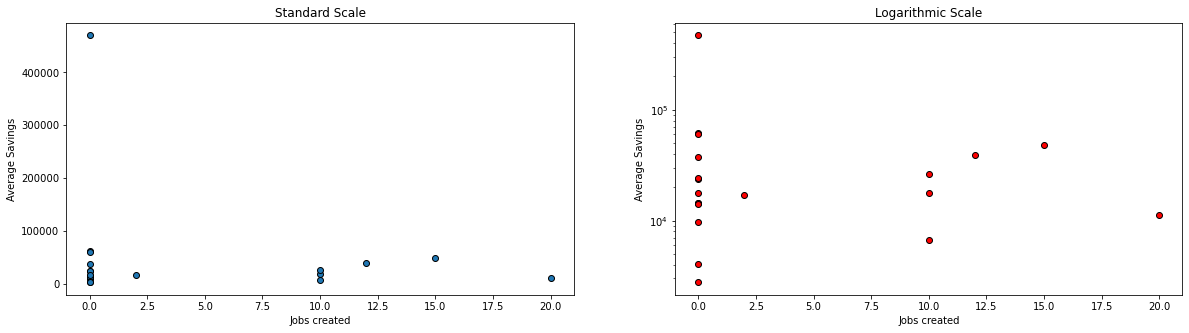

In [10]:
#Task 1: Create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
fig, ax = plt.subplots(1,2,figsize=(20, 5))
ax[0].scatter(x, y, facecolor='C0', edgecolor='k');
ax[0].set_xlabel('Jobs created')
ax[0].set_ylabel('Average Savings')
ax[0].set_title('Standard Scale')
ax[1].set_yscale('log')
ax[1].scatter(x, y, facecolor='r', edgecolor='k');
ax[1].set_title('Logarithmic Scale')
ax[1].set_xlabel('Jobs created')
ax[1].set_ylabel('Average Savings')

Text(0.5, 1.0, 'Log of Average Savings')

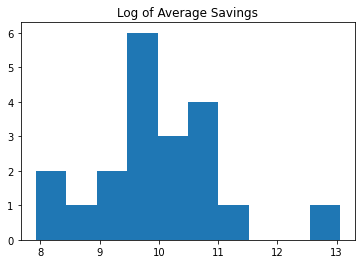

In [11]:
#TASK 2: Create histogram of the log of the average total savings.
fig2, ax2 = plt.subplots()
#ax2.set_xscale('log')
ax2.hist(np.log(y))
ax2.set_title('Log of Average Savings')


Text(0.5, 1.0, 'Jobs created Monthly')

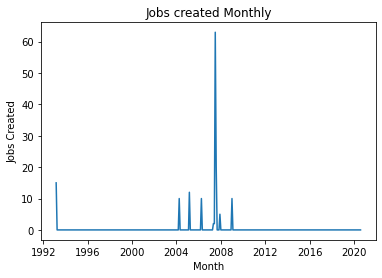

In [12]:
#TASK 3: Create a line plot of the total jobs created for each month.
myseries=df['Job created']
myseries.index=df['Effective Date']
myseries=myseries.fillna(0)
myseries_mos=myseries.resample('M').sum()
fig3, ax3 = plt.subplots()
ax3.plot(myseries_mos)
ax3.set_xlabel('Month')
ax3.set_ylabel('Jobs Created')
ax3.set_title('Jobs created Monthly')
